In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.optimize import curve_fit
import seaborn as sns
import colorcet as cc

Notebook to identify the square-root $K_0/N$ scaling rule in the human data collected in Prolific ("Pilot 1" data, the grid of K values scales linearly with N), to define a new grid of K values to use in the experiment.

# Empirical data:

## K grid (linear scaling):

In [2]:
N_values_complete = np.array([100,150,200,300,400,480,600,800,1000])
# current grid of K values:
# - grid defined for N=1000, linearly scaled to other N values
linearKgrid_N1000 = np.array([300, 300, 267, 267, 233, 233, 217, 217, 200, 200, 183, 183, 167, 167, 150, 150, 133, 133, 117, 117, 100, 100, 83, 83, 67, 67, 50, 50, 33, 33])
linearKgrid_N1000 = np.unique(linearKgrid_N1000)
# - grid for other N values:
linearKgrid_N100 = np.round(linearKgrid_N1000 * (100 / 1000))
linearKgrid_N150 = np.round(linearKgrid_N1000 * (150 / 1000))
linearKgrid_N200 = np.round(linearKgrid_N1000 * (200 / 1000))
linearKgrid_N300 = np.round(linearKgrid_N1000 * (300 / 1000))
linearKgrid_N400 = np.round(linearKgrid_N1000 * (400 / 1000))
linearKgrid_N480 = np.round(linearKgrid_N1000 * (480 / 1000))
linearKgrid_N600 = np.round(linearKgrid_N1000 * (600 / 1000))
linearKgrid_N800 = np.round(linearKgrid_N1000 * (800 / 1000))

print("linearKgrid_N300:", linearKgrid_N300)

linearKgrid_N300: [10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 80. 90.]


## K0 values from Pilot 1 experiments:

In [3]:
N_values_pilot1 = np.array([100, 150, 200, 300, 1000])
# single K0 values for different N values:
K0s_data_pilot1 = {
    100: np.array([48.128170, 35.459035, 30.204069, 31.091868]),
    150: np.array([46.822966, 32.780615, 41.631147, 53.420761, 58.236056]),
    200: np.array([43.662996, 66.450325, 38.211290, 46.579266, 47.925053]),
    300: np.array([51.680571, 70.408732, 38.432523, 112.615314, 87.777978]),
    1000: np.array([106.441448, 134.566948, 117.841705, 175.501701, 267.799262])    
}

# -mean K0s dataframe (for seaborn plotting):
data = []
K0s_means_pilot1 = []
for N in N_values_pilot1:
    K0s = np.array(K0s_data_pilot1[N])
    K0s_means_pilot1.append(K0s.mean())
    for k in K0s:
        data.append({'N': N, 'K0': k})

df_pilot1 = pd.DataFrame(data)

print("K0s_means_pilot1:", K0s_means_pilot1)
display(df_pilot1)

K0s_means_pilot1: [np.float64(36.2207855), np.float64(46.578309), np.float64(48.565785999999996), np.float64(72.1830236), np.float64(160.4302128)]


,N,K0
0,100,48.128170
1,100,35.459035
2,100,30.204069
3,100,31.091868
4,150,46.822966
5,150,32.780615
6,150,41.631147
7,150,53.420761
8,150,58.236056
9,200,43.662996


## K0 values from Thesis experiments:

In [4]:
N_values_thesis = np.array([300, 1000])
# single K0 values for different N values:
K0s_data_thesis = {
    300: np.array([63.818980, 58.745489, 44.120618, 48.510949, 45.204086, 55.106889, 62.418518, 63.945276, 36.303401, 44.053990, 44.146266, 47.651970, 45.081888, 71.677963, 40.018603]),
    1000: np.array([101.666836, 117.000000, 113.430083, 92.021640, 95.709476, 120.846179, 113.491423, 116.649230, 98.652622, 56.147715, 86.980211, 100.336157, 92.569721, 126.110776, 88.996111])    
}

# -mean K0s dataframe (for seaborn plotting):
data = []
K0s_means_thesis = []
for N in N_values_thesis:
    K0s = np.array(K0s_data_thesis[N])
    K0s_means_thesis.append(K0s.mean())
    for k in K0s:
        data.append({'N': N, 'K0': k})

df_thesis = pd.DataFrame(data)

print("K0s_means_thesis:", K0s_means_thesis)
display(df_thesis)

K0s_means_thesis: [np.float64(51.386992400000004), np.float64(101.37387866666667)]


,N,K0
0,300,63.818980
1,300,58.745489
2,300,44.120618
3,300,48.510949
4,300,45.204086
5,300,55.106889
6,300,62.418518
7,300,63.945276
8,300,36.303401
9,300,44.053990


## K0 values from NN experiments:

In [5]:
N_values_NNs = np.array([100, 150, 200, 300, 400, 480, 600, 800, 1200])
# single K0 values for different N values:
K0s_data_NNs = {
    100: {'CNN': 18.45, 'MLP': 22.00, 'ViTpretrained': 20.22, 'ViTscratch': 25.52},
    150: {'CNN': 24.30, 'MLP': 33.75, 'ViTpretrained': 26.29, 'ViTscratch': 31.17},
    200: {'CNN': 2724.85, 'MLP': 42.58, 'ViTpretrained': 32.34, 'ViTscratch': 37.16},
    300: {'CNN': 7713459.20, 'MLP': 65.18, 'ViTpretrained': 43.74, 'ViTscratch': 47.27},
    400: {'CNN': 5895.78, 'MLP': 84.29, 'ViTpretrained': 50.69, 'ViTscratch': 60.39},
    480: {'CNN': 58.52, 'MLP': 103.19, 'ViTpretrained': 58.24, 'ViTscratch': 65.40},
    600: {'CNN': 69.95, 'MLP': 126.28, 'ViTpretrained': 71.33, 'ViTscratch': 81.62},
    800: {'CNN': 69.86, 'MLP': 173.50, 'ViTpretrained': 86.56, 'ViTscratch': 102.61},
    1200: {'CNN': 167.72, 'MLP': 264.75, 'ViTpretrained': 166.36, 'ViTscratch': 146.60}    
}

# transforming the data into a DataFrame for seaborn plotting
data = []
for N in N_values_NNs:
    for model in ['CNN', 'MLP', 'ViTpretrained', 'ViTscratch']:
        K0 = K0s_data_NNs[N][model]
        data.append({'N': N, 'K0': K0, 'model': model})
df_NNs = pd.DataFrame(data)

display(df_NNs)

,N,K0,model
0,100,18.45,CNN
1,100,22.00,MLP
2,100,20.22,ViTpretrained
3,100,25.52,ViTscratch
4,150,24.30,CNN
5,150,33.75,MLP
6,150,26.29,ViTpretrained
7,150,31.17,ViTscratch
8,200,2724.85,CNN
9,200,42.58,MLP


# Finding sqrt scaling fitting Pilot 1 data:

Find $\alpha$ and $\beta$ that fit $f(N) = \sqrt{\alpha N + \beta }$, to find the emerging $K_0/N$ dependency, and use it to define the new K grid.

In [6]:
def sqrt_model(N, alpha, beta):
    return np.sqrt(alpha * N + beta)

# fit model parameters (only using pilot1 data):
popt, pcov = curve_fit(sqrt_model, N_values_pilot1, K0s_means_pilot1)
alpha, beta = popt
print("Fitted parameters: alpha =", alpha, ", beta =", beta)

Fitted parameters: alpha = 25.693477922627718 , beta = -1676.1595401916986


# Defining New K grid:

Defining the new N=1000 grid (17 K values instead of 15) and scaling for other N values with the sqrt_model function.

In [7]:
# using the new model to predict K0s for all N values:
K0s_pred = sqrt_model(N_values_complete, alpha, beta)
print("K0s_pred:", K0s_pred)

# Fixed points
start = linearKgrid_N1000[0]
center = K0s_pred[8]
end = linearKgrid_N1000[-1]

# Define step size for each side
step_down = (center - start) / 10   # 10 steps down to center (2x[2 steps] + 6x[1 step])
step_up = (end - center) / 10   # 10 steps up to center (6x[1 step] + 2x[2 steps])

# Step multipliers
left_multipliers = np.array([2, 2, 1, 1, 1, 1, 1, 1])   # 8 elements before center
right_multipliers = np.array([1, 1, 1, 1, 1, 1, 2, 2])  # 8 elements after center

# Cumulative sums of spacing (absolute distances from the center)
left_offsets = np.cumsum(left_multipliers[::-1]) * step_down
right_offsets = np.cumsum(right_multipliers) * step_up

# Left side: center minus reversed offsets
left_side = center - left_offsets[::-1]  # Now increasing toward center

# Right side: center plus offsets
right_side = center + right_offsets

# Full grid
newKgrid_N1000 = np.concatenate([left_side, [center], right_side])
newKgrid_N1000 = np.round(newKgrid_N1000).astype(int)

# defining the new grid of K values by scaling the N=300 grid to other N values using the sqrt_model function:
for i, N_value in enumerate(sorted(N_values_complete)):
    if N_value == 1000:
        continue  # Skip N=1000 as it's already defined
    K_grid_N = sqrt_model(N_value, alpha, beta) * newKgrid_N1000 / sqrt_model(1000, alpha, beta)
    K_grid_N = np.round(K_grid_N).astype(int)

    # checking that the central value of the grid is the predicted K0 value:
    if K_grid_N[8] != np.round(K0s_pred[i]):
        print(f"Warning: Central value of K grid for N={N_value} does not match predicted K0 value!")
        
    if len(K_grid_N) != 17:
        print(f"Warning: K grid for N={N_value} does not have 17 values!")
    
    # Create variable named newKgrid_N{N_value}
    globals()[f"newKgrid_N{N_value}"] = K_grid_N            

for i, N_value in enumerate(sorted(N_values_complete)):
    print("-------------------")
    print("N=", N_value)
    print("Old K grid:", globals()[f"linearKgrid_N{N_value}"])
    print("New K grid:", globals()[f"newKgrid_N{N_value}"])
    print("Spacing between values in the new grid:", np.diff(globals()[f"newKgrid_N{N_value}"])) 

K0s_pred: [ 29.88625524  46.66757063  58.84331775  77.66520351  92.74282521
 103.23134147 117.21743562 137.39950072 154.97521861]
-------------------
N= 100
Old K grid: [ 3.  5.  7.  8. 10. 12. 13. 15. 17. 18. 20. 22. 23. 27. 30.]
New K grid: [ 6 11 16 18 20 23 25 28 30 33 35 38 41 44 47 52 58]
Spacing between values in the new grid: [5 5 2 2 3 2 3 2 3 2 3 3 3 3 5 6]
-------------------
N= 150
Old K grid: [ 5.  8. 10. 12. 15. 18. 20. 22. 25. 27. 30. 33. 35. 40. 45.]
New K grid: [10 17 25 28 32 36 39 43 47 51 55 60 64 68 73 82 90]
Spacing between values in the new grid: [7 8 3 4 4 3 4 4 4 4 5 4 4 5 9 8]
-------------------
N= 200
Old K grid: [ 7. 10. 13. 17. 20. 23. 27. 30. 33. 37. 40. 43. 47. 53. 60.]
New K grid: [ 13  22  31  36  40  45  50  54  59  64  70  75  81  86  92 103 114]
Spacing between values in the new grid: [ 9  9  5  4  5  5  4  5  5  6  5  6  5  6 11 11]
-------------------
N= 300
Old K grid: [10. 15. 20. 25. 30. 35. 40. 45. 50. 55. 60. 65. 70. 80. 90.]
New K grid: [ 17

In [12]:
# printing all the new K grids in reverse order (easier to generate K grid)
for i, N_value in enumerate(sorted(N_values_complete)):
    print("-------------------")
    print("N=", N_value)
    print("New K grid:", repr(np.flip(globals()[f"newKgrid_N{N_value}"])))

-------------------
N= 100
New K grid: array([58, 52, 47, 44, 41, 38, 35, 33, 30, 28, 25, 23, 20, 18, 16, 11,  6])
-------------------
N= 150
New K grid: array([90, 82, 73, 68, 64, 60, 55, 51, 47, 43, 39, 36, 32, 28, 25, 17, 10])
-------------------
N= 200
New K grid: array([114, 103,  92,  86,  81,  75,  70,  64,  59,  54,  50,  45,  40,
        36,  31,  22,  13])
-------------------
N= 300
New K grid: array([150, 136, 121, 114, 107,  99,  92,  85,  78,  72,  66,  59,  53,
        47,  41,  29,  17])
-------------------
N= 400
New K grid: array([180, 162, 145, 136, 127, 118, 110, 101,  93,  86,  78,  71,  63,
        56,  49,  34,  20])
-------------------
N= 480
New K grid: array([200, 181, 161, 151, 142, 132, 123, 113, 103,  95,  87,  79,  71,
        63,  55,  38,  22])
-------------------
N= 600
New K grid: array([227, 205, 183, 172, 161, 150, 139, 128, 117, 108,  99,  89,  80,
        71,  62,  43,  25])
-------------------
N= 800
New K grid: array([266, 240, 215, 201, 189, 176,

Scaling the N=300 grid (UNUSED, SCALING THE N=1000 GRID INSTEAD).

In [ ]:
# using the new model to predict K0s for all N values:
K0s_pred = sqrt_model(N_values_complete, alpha, beta)
print("K0s_pred:", K0s_pred)
# the K grid at N1000 was the one with the best alignment with Pilot1 data
spacing_arr_N300 = np.diff(linearKgrid_N300)
print("spacing_arr_N300 (linear scaling):", spacing_arr_N300)
# MODIFICATION for new grid: 17 K values instead of 15 -> two values are added at the beginning of the array, spaced by 10:
spacing_arr_N300 = np.concatenate(([10, 10], spacing_arr_N300))
print("spacing_arr_N300 (modified):", spacing_arr_N300)
print(len(spacing_arr_N300))
# defining the grid of K values for N=300:
Kgrid_N300_unrounded = np.zeros(17)
Kgrid_N300_unrounded[8] = K0s_pred[3]  # center
# Fill values to the left of center
for j in range(7, -1, -1):
    Kgrid_N300_unrounded[j] = Kgrid_N300_unrounded[j + 1] - spacing_arr_N300[j]
# Fill values to the right of center
for j in range(8, 16):
    Kgrid_N300_unrounded[j + 1] = Kgrid_N300_unrounded[j] + spacing_arr_N300[j]
# Round final values
Kgrid_N300 = np.round(Kgrid_N300_unrounded).astype(int)
print("Kgrid_N300:", Kgrid_N300)

# defining the new grid of K values by scaling the N=300 grid to other N values using the sqrt_model function:
for i, N_value in enumerate(sorted(N_values_complete)):
    if N_value == 300:
        continue
    K_grid_N = sqrt_model(N_value, alpha, beta) * Kgrid_N300_unrounded / sqrt_model(300, alpha, beta)
    K_grid_N = np.round(K_grid_N).astype(int)
    
    print(f"N={N_value}, K grid:", K_grid_N)
    
    # checking that the central value of the grid is the predicted K0 value:
    if K_grid_N[8] != np.round(K0s_pred[i]):
        print(f"Warning: Central value of K grid for N={N_value} does not match predicted K0 value!")
    
    # Create variable named sqrtKgrid_N{N_value}
    globals()[f"sqrtKgrid_N{N_value}"] = K_grid_N            

Creating the new grid by scaling linearly the grid at N=300 and scaling it by an arbitrary factor (CLUMSY PROCEDURE, NOT USED).

In [ ]:
# using the new model to predict K0s for all N values:
K0s_pred = sqrt_model(N_values_complete, alpha, beta)
print("K0s_pred:", K0s_pred)
# the K grid at N300 was used as a reference to define the spacing between K values. Modifyi
spacing_arr_N300 = np.diff(linearKgrid_N300)
print("spacing_arr_N300 (linear scaling):", spacing_arr_N300)
# MODIFICATION for new grid: 17 K values instead of 15 -> two values are added at the beginning of the array, spaced by 10:
spacing_arr_N300 = np.concatenate(([10, 10], spacing_arr_N300))
print("spacing_arr_N300 (modified):", spacing_arr_N300)
print(len(spacing_arr_N300))
# creating the new grid of K values, centered around the predicted K0s:
for i, N_value in enumerate(sorted(N_values_complete)):
    if N_value == 300:
        continue    
    scaled_spacing = spacing_arr_N300 * (N_value / 300)
    
    # scaling down the spacing for larger N values, to avoid having negative K values in the grid and keep the sqrt grid close to the linear one:
    if N_value == 1000:
        scaled_spacing = scaled_spacing* 0.78
    elif N_value == 800:
        scaled_spacing = scaled_spacing * 0.9
    elif N_value == 600:
        scaled_spacing = scaled_spacing * 0.95
    # scaling up the spacing for smaller N values, increase the separation between K values in the grid:
    elif N_value == 100:
        scaled_spacing = scaled_spacing * 1.3
    elif N_value == 150:
        scaled_spacing = scaled_spacing * 1.2
    elif N_value == 200:
        scaled_spacing = scaled_spacing * 1.1
    
    grid = np.zeros(17)
    grid[8] = K0s_pred[i]  # center

    # Fill values to the left of center
    for j in range(7, -1, -1):
        grid[j] = grid[j + 1] - scaled_spacing[j]

    # Fill values to the right of center
    for j in range(8, 16):
        grid[j + 1] = grid[j] + scaled_spacing[j]

    # Round final values
    grid_rounded = np.round(grid).astype(int)
    print(f"N={N_value}, grid:", grid_rounded)
    
    # Create variable named sqrtKgrid_N{N_value}
    globals()[f"sqrtKgrid_N{N_value}"] = grid_rounded    

# Plotting:

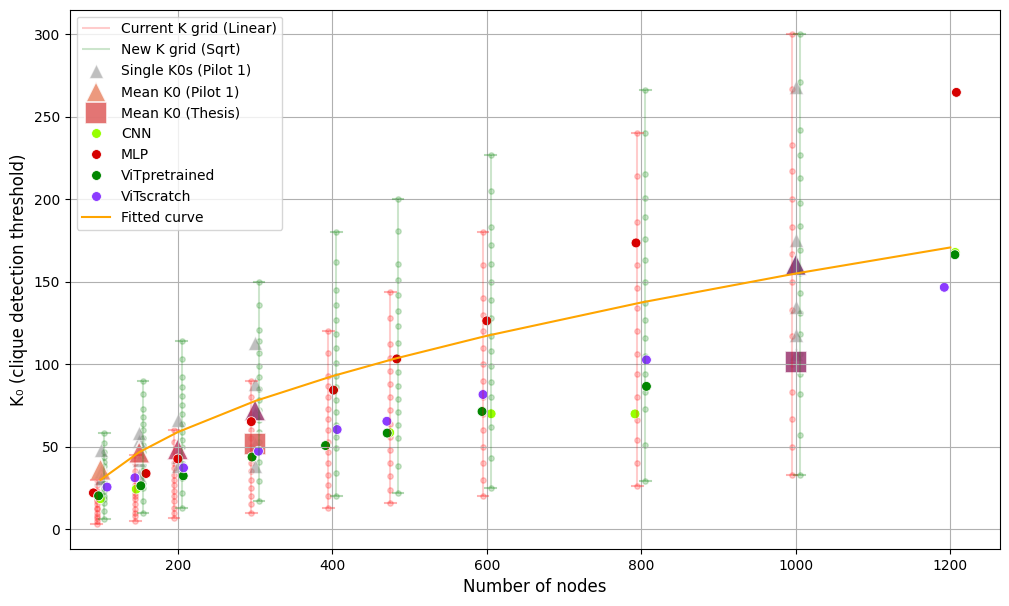

In [11]:
# Plot
fig, ax = plt.subplots(figsize=(12, 7))

# Vertical lines for grid spans (min/max)
for i, N in enumerate(N_values_complete):
    lineargrid_currentN = np.array([linearKgrid_N100, linearKgrid_N150, linearKgrid_N200, linearKgrid_N300, linearKgrid_N400, linearKgrid_N480, linearKgrid_N600, linearKgrid_N800, linearKgrid_N1000])[i]
    sqrtgrid_currentN = np.array([newKgrid_N100, newKgrid_N150, newKgrid_N200, newKgrid_N300, newKgrid_N400, newKgrid_N480, newKgrid_N600, newKgrid_N800, newKgrid_N1000])[i]
    
    # Pilot1 grid (linear)
    plt.vlines(x=N-5, ymin=lineargrid_currentN.min(), ymax=lineargrid_currentN.max(), color='red', alpha=0.2, linewidth=1.5, label='Current K grid (Linear)' if i == 0 else None)
    plt.scatter([N-5] * len(lineargrid_currentN), lineargrid_currentN, color='red', alpha=0.2, s=15)
    plt.plot([N - 12, N + 2], [lineargrid_currentN.min(), lineargrid_currentN.min()], color='red', alpha=0.3, linewidth=1.5)
    plt.plot([N - 12, N + 2], [lineargrid_currentN.max(), lineargrid_currentN.max()], color='red', alpha=0.3, linewidth=1.5)

    # New grid (sqrt)
    plt.vlines(x=N+5, ymin=sqrtgrid_currentN.min(), ymax=sqrtgrid_currentN.max(), color='green', alpha=0.2, linewidth=1.5, label='New K grid (Sqrt)' if i == 0 else None)
    plt.scatter([N+5] * len(sqrtgrid_currentN), sqrtgrid_currentN, color='green', alpha=0.2, s=15)
    plt.plot([N - 2, N + 12], [sqrtgrid_currentN.min(), sqrtgrid_currentN.min()], color='green', alpha=0.3, linewidth=1.5)
    plt.plot([N - 2, N + 12], [sqrtgrid_currentN.max(), sqrtgrid_currentN.max()], color='green', alpha=0.3, linewidth=1.5)

# Scatter plot for individual K0 values:
# - Pilot data:
ax = sns.scatterplot(data=df_pilot1, x='N', y='K0', color='gray', marker="^", alpha=0.5, s=100, label='Single K0s (Pilot 1)')

# Mean K0 values:
# - Pilot data:
sns.scatterplot(x=N_values_pilot1, y=K0s_means_pilot1, color=sns.color_palette("flare", 5), marker="^", s=250, alpha=0.85, label='Mean K0 (Pilot 1)', ax=ax)
# - Thesis data:
sns.scatterplot(x=N_values_thesis, y=K0s_means_thesis, color=sns.color_palette("flare", 2), marker="s", s=250, alpha=0.85, label='Mean K0 (Thesis)', ax=ax)
# - NNs data:
# in this case, not necessary to keep consistency with previous visualizations
model_names_palette = ['MLP', 'ViTscratch', 'ViTpretrained', 'CNN']
# defining custom palette:
machines_palette = {
    'MLP': sns.color_palette(cc.glasbey, len(model_names_palette)+1)[0],
    'ViTscratch': sns.color_palette(cc.glasbey, len(model_names_palette)+1)[1],
    'ViTpretrained': sns.color_palette(cc.glasbey, len(model_names_palette)+1)[2],
    # skipping the color for 'Variance_test' as it is not considered as a model
    'CNN': sns.color_palette(cc.glasbey, len(model_names_palette)+1)[4]
}
# Loop through the N values:
for i, N_value in enumerate(sorted(N_values_NNs)):
    # Isolating data for the current N value:
    currentN_K0 = df_NNs[df_NNs['N'] == N_value]

    # Filtering the data to keep only the models for which K0 is smaller than N:
    currentN_K0 = currentN_K0[currentN_K0['K0'] < int(N_value)]
    # Filtering the palette
    machines_palette_filtered = {key: machines_palette[key] for key in currentN_K0['model'].unique()}

    # Add a small jitter to the N column to avoid overlap
    jittered_x = currentN_K0['N'] + np.random.uniform(-10, 10, size=len(currentN_K0))

    # Draw scatterplot with jittered x values (only drawing one legend)
    sns.scatterplot(data=currentN_K0, x=jittered_x, y='K0', hue='model',
                    palette=machines_palette_filtered, legend=(N_value == 800), s=50, ax=ax)    # Only draw legend for N=400 (contains MLP variants)

# Fitted curve
sns.lineplot(x=np.array([100, 150, 200, 300, 400, 480, 600, 800, 1000, 1200]), y=sqrt_model(np.array([100, 150, 200, 300, 400, 480, 600, 800, 1000, 1200]), alpha, beta), color='orange', label='Fitted curve', ax=ax)

# Add axes labels to the plot
ax.set_xlabel('Number of nodes', size=12)
ax.set_xlim(60, *ax.get_xlim()[1:])

# log-scaling flag
logscale = False
if logscale:
    ax.set_ylabel('Log K₀ (clique detection threshold)', size=12)
    ax.set_yscale('log', base=2)
else:
    ax.set_ylabel('K₀ (clique detection threshold)', size=12)

# Using ScalarFormatter to format the y-axis with actual numbers instead of powers of 2
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())
plt.grid()
plt.legend()
plt.show()

-----------


Meeting on (28/04/2025):

[30.  30.  26.7 26.7 23.3 23.3 21.7 21.7 20.  20.  18.3 18.3 16.7 16.7
 15.  15.  13.3 13.3 11.7 11.7 10.  10.   8.3  8.3  6.7  6.7  5.   5.
  3.3  3.3]
[ 47.4341649   58.09475019  67.08203932  82.15838363  94.86832981
 103.92304845 116.18950039 134.16407865 150.        ]


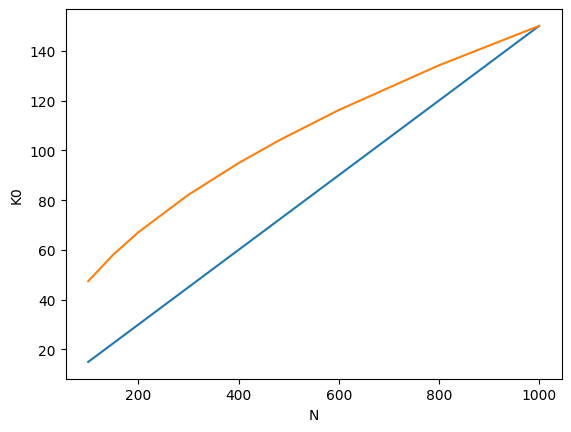

In [58]:
v = np.array([300, 300, 267, 267, 233, 233, 217, 217, 200, 200, 183, 183, 167, 167, 150, 150, 133, 133, 117, 117, 100, 100, 83, 83, 67, 67, 50, 50, 33, 33]);
v = v/1000
print(v*100)

n_grid = np.array([100,150,200,300,400,480,600,800,1000])

plt.plot(n_grid, 0.150*n_grid)
plt.plot(n_grid, 0.150*np.sqrt(1000)*np.sqrt(n_grid))
plt.xlabel('N')
plt.ylabel('K0')

print(0.150*np.sqrt(1000)*np.sqrt(n_grid))